In [0]:
!pip install fbprophet

In [0]:
!pip install tiingo

In [0]:
!pip install quandl

In [0]:
!pip install scrapy

In [0]:
import scrapy
import quandl

import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import datetime
import os
import seaborn as sns
import math as mth
import pickle
import re
import nltk
import spacy
import sklearn


import bokeh
from bokeh.plotting import *
from bokeh.io import output_notebook
from bokeh.models import Toggle, BoxAnnotation, CustomJS, HoverTool

output_notebook()


sns.set_style("white")

%matplotlib inline

from IPython.display import display

from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

# Display active python version
import platform
platform.python_version()

Loading BokehJS ...

'3.6.7'

In [0]:
from tiingo import TiingoClient

config = {}

config['api_key'] = "06116d5e0fde515461a370219042afbfa023b85c"

client = TiingoClient(config)

from fbprophet import Prophet

In [0]:
def hist_data(symbol,startDate,endDate,frequency):
    data = client.get_ticker_price(ticker=symbol,
                                        startDate=startDate,
                                        endDate=endDate,
                                        frequency=frequency)
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
    df.index = df['date']
    
    return df

In [0]:
def quandl_data(dataset):
  
  dataset = dataset
  data = quandl.get(dataset=dataset,
             api_key='GkD22rnR-DByq6AHz8ys')
  
  return data

In [0]:
def create_forecast(symbol,start_date,end_date,frequency):
    
    startDate = start_date
    endDate = end_date
    #endDate = pd.datetime.today()
    #frequency = 'daily'
    frequency = frequency
    
    df1 = hist_data(symbol,startDate,endDate,frequency)
    
    
    df2 = pd.DataFrame(df1.iloc[:,:5],index=df1.index)

    df3 = pd.DataFrame(df2['adjClose'])
    df3['ds'] = df2.index
    df3.rename(columns={'adjClose':'y'},inplace=True)

    m = Prophet(growth='linear',
                uncertainty_samples=10000,
                daily_seasonality=True,
                yearly_seasonality=True,
                changepoint_prior_scale=0.13)

    m.fit(df3)
    
    future_prices = m.make_future_dataframe(periods=365)

    forecast = m.predict(future_prices)
    forecast[['ds','yhat','yhat_lower','yhat_upper','trend_lower','trend_upper']].tail()

    forecast2 = pd.DataFrame(forecast)
    forecast2.index = forecast['ds']
    
    RMSE = np.sqrt(np.mean((forecast['yhat'] - df3['y'])**2))
    
    
    return (df1.head(),df1.tail(),m.plot(forecast2),m.plot_components(forecast),print('RMSE:'.format(RMSE)))

  
def create_forecast_2(dataset,y):
    
    
    data = quandl_data(dataset)
    
    data2 = pd.DataFrame(data[y],index=data.index)
    data2['ds'] = data2.index
    data2.rename(columns={y:'y'},inplace=True)

    
    m = Prophet(growth='linear',
                uncertainty_samples=10000,
                daily_seasonality=True,
                yearly_seasonality=True,
                changepoint_prior_scale=0.13)

    m.fit(data2)
    
    future_data = m.make_future_dataframe(periods=365)

    forecast = m.predict(future_data)
    forecast[['ds','yhat','yhat_lower','yhat_upper','trend_lower','trend_upper']].tail()

    forecast2 = pd.DataFrame(forecast)
    forecast2.index = forecast['ds']
    
    forecast_diff = (forecast['yhat'] - data2['y'])
    forecast_sq = (np.power(forecast_diff,2))
    forecast_mean = (np.mean(forecast_sq))
    RMSE = (np.sqrt(forecast_mean))
    
    
    return (data.head(),data.tail(),m.plot(forecast2),m.plot_components(forecast),print('RMSE:'.format(RMSE)))
  
  
def create_forecast_3(dataset,y):
    
    
    data =dataset
    
    data2 = pd.DataFrame(data[y],index=data.index)
    data2['ds'] = data2.index
    data2.rename(columns={y:'y'},inplace=True)

    
    m = Prophet(growth='linear',
                uncertainty_samples=10000,
                daily_seasonality=True,
                yearly_seasonality=True,
                changepoint_prior_scale=0.13)

    m.fit(data2)
    
    future_data = m.make_future_dataframe(periods=365)

    forecast = m.predict(future_data)
    forecast[['ds','yhat','yhat_lower','yhat_upper','trend_lower','trend_upper']].tail()

    forecast2 = pd.DataFrame(forecast)
    forecast2.index = forecast['ds']
    
    forecast_diff = (forecast['yhat'] - data2['y'])
    forecast_sq = (np.power(forecast_diff,2))
    forecast_mean = (np.mean(forecast_sq))
    RMSE = (np.sqrt(forecast_mean))
    
    
    return (data.head(),data.tail(),m.plot(forecast2),m.plot_components(forecast),print('RMSE:'.format(RMSE)))

RMSE:
CPU times: user 42.6 s, sys: 21.3 s, total: 1min 3s
Wall time: 37.1 s


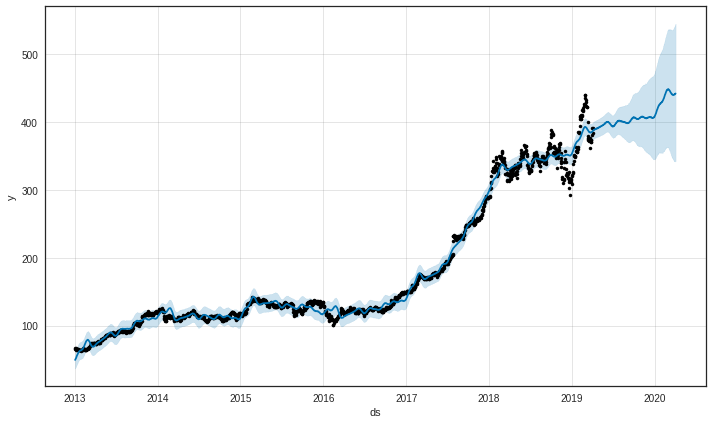

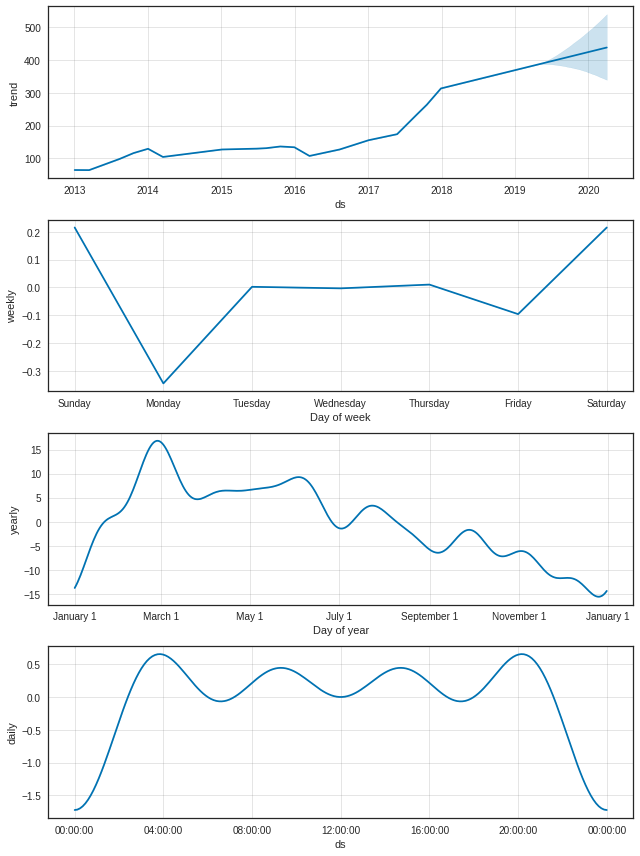

In [0]:
%%time
forecast_df1 = create_forecast('BA','2013-01-01',datetime.date.today(),'daily')

RMSE:
CPU times: user 39.9 s, sys: 19.8 s, total: 59.7 s
Wall time: 34.1 s


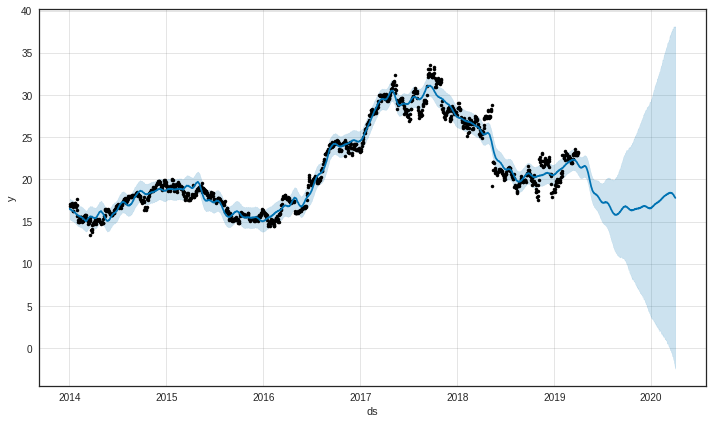

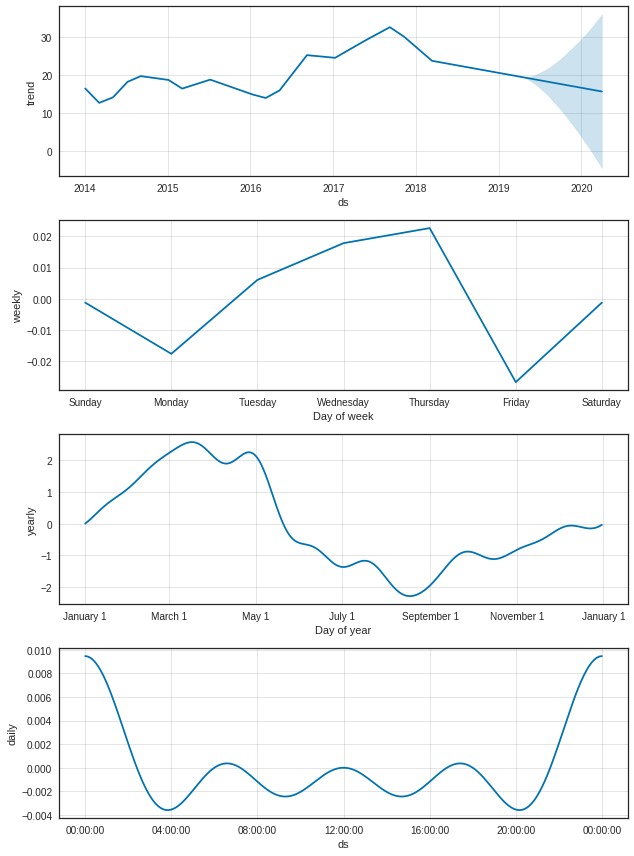

In [0]:
%%time
forecast_df1 = create_forecast('SYMC','2014-01-01',datetime.date.today(),'daily')

RMSE:
CPU times: user 38.4 s, sys: 19.7 s, total: 58.2 s
Wall time: 32.5 s


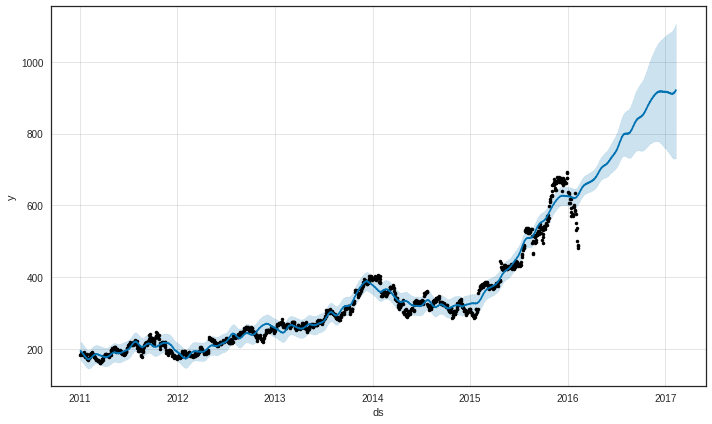

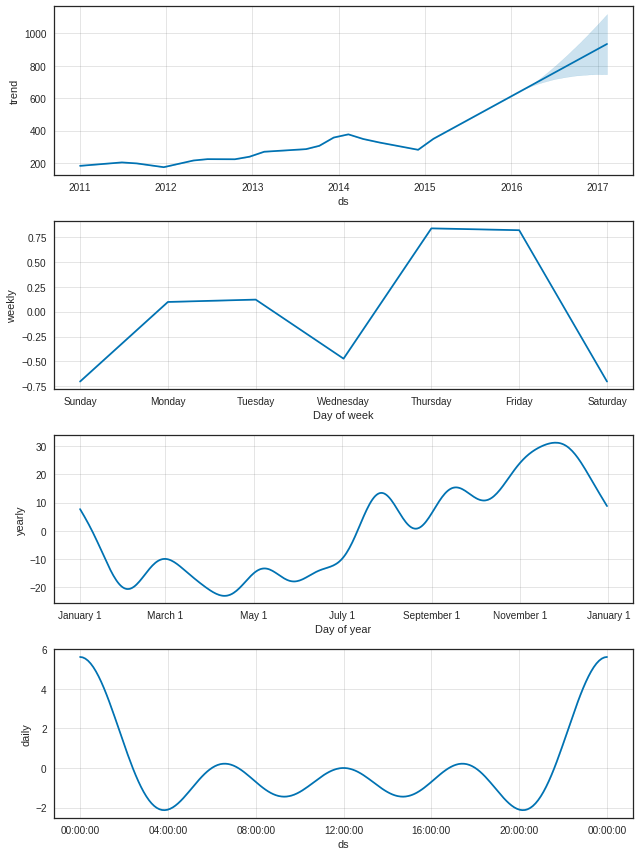

In [0]:
%%time
forecast_df1 = create_forecast('AMZN','2011-01-01','2016-02-10','daily')

RMSE:
CPU times: user 43.9 s, sys: 20.7 s, total: 1min 4s
Wall time: 37.8 s


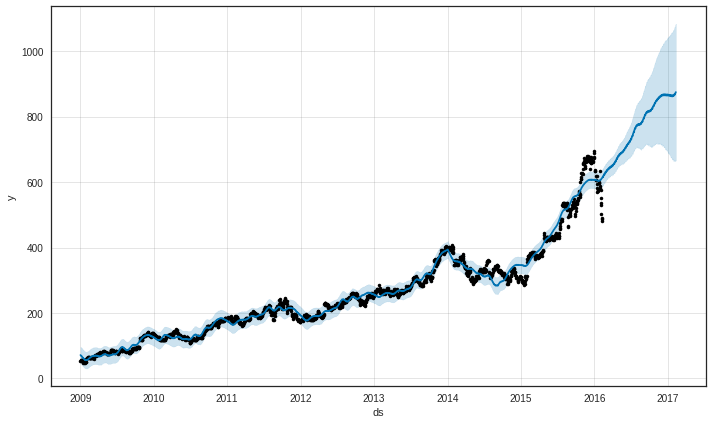

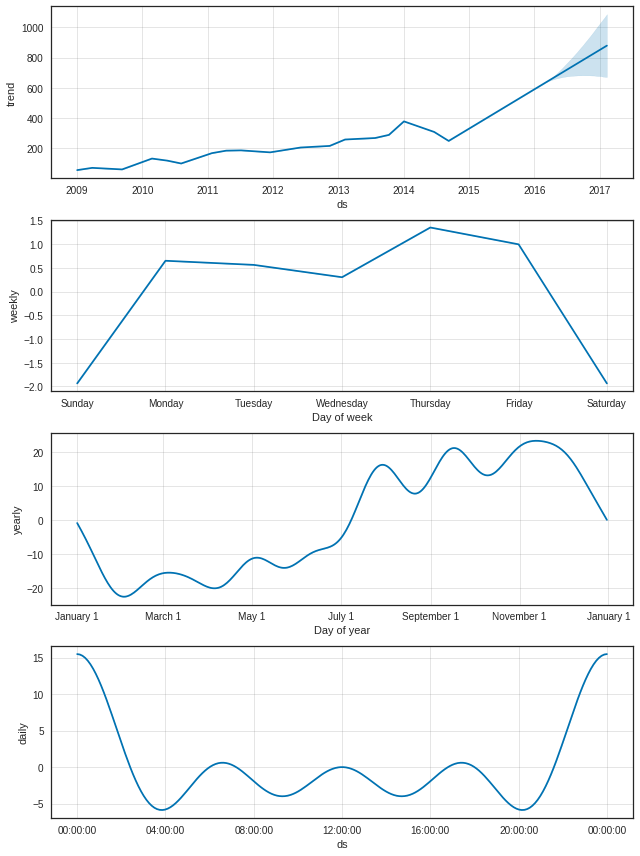

In [0]:
%%time
forecast_df1 = create_forecast('AMZN','2009-01-01','2016-02-10','daily')

RMSE:
CPU times: user 48.7 s, sys: 21.8 s, total: 1min 10s
Wall time: 41.8 s


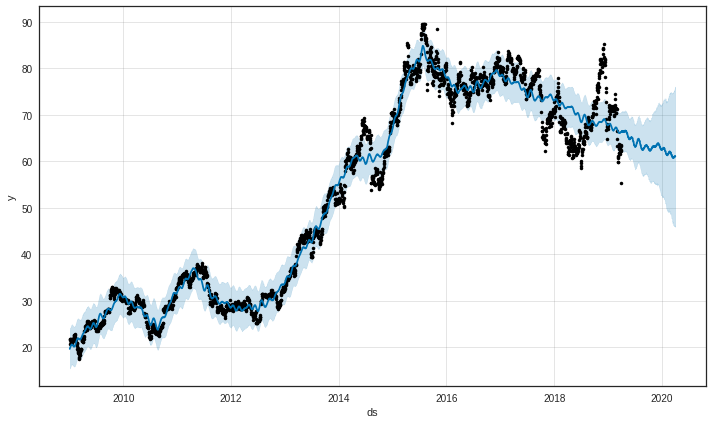

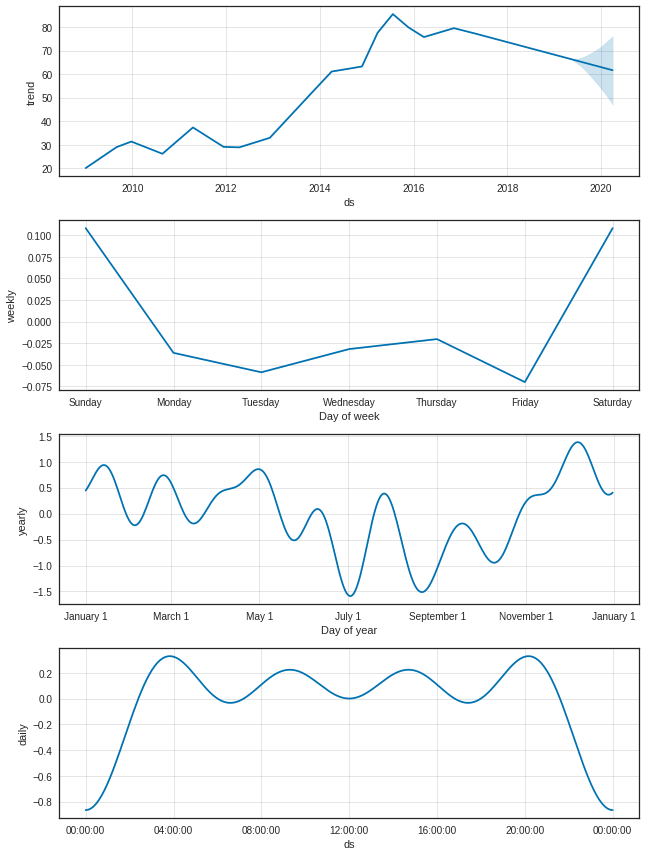

In [0]:
%%time
forecast_df1 = create_forecast('WBA','2009-01-01',datetime.date.today(),'daily')

RMSE:
CPU times: user 40.2 s, sys: 19.8 s, total: 59.9 s
Wall time: 34.5 s


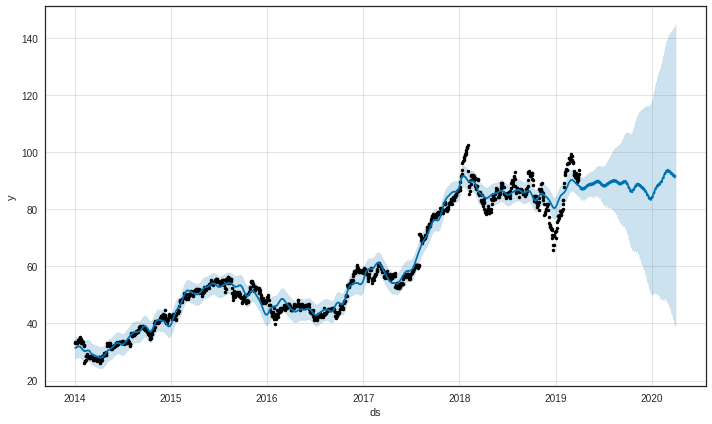

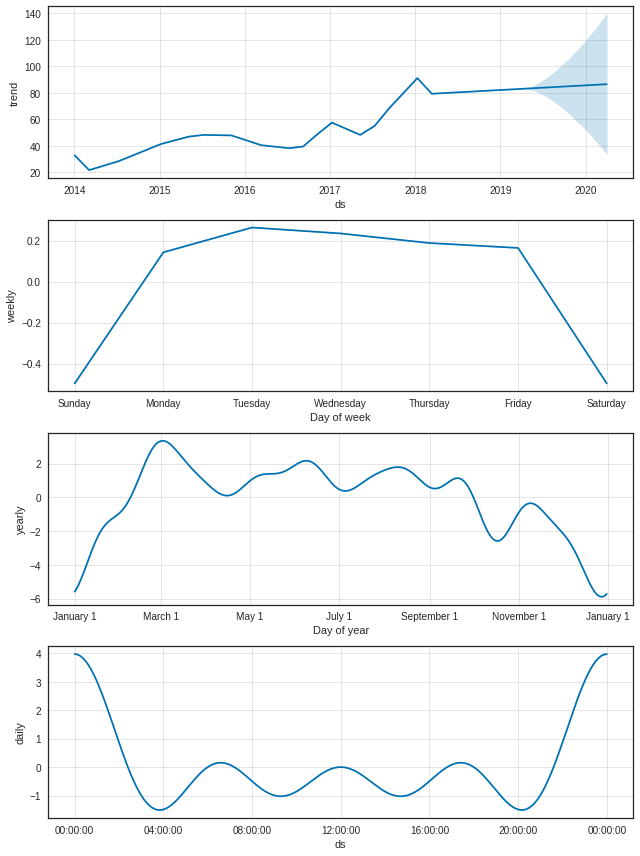

In [0]:
%%time
forecast_df1 = create_forecast('SPR','2014-01-01',datetime.date.today(),'daily')

RMSE:
CPU times: user 48.9 s, sys: 21.5 s, total: 1min 10s
Wall time: 42.5 s


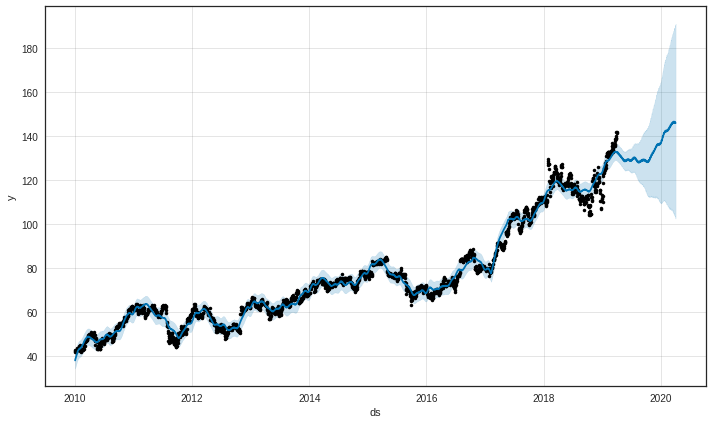

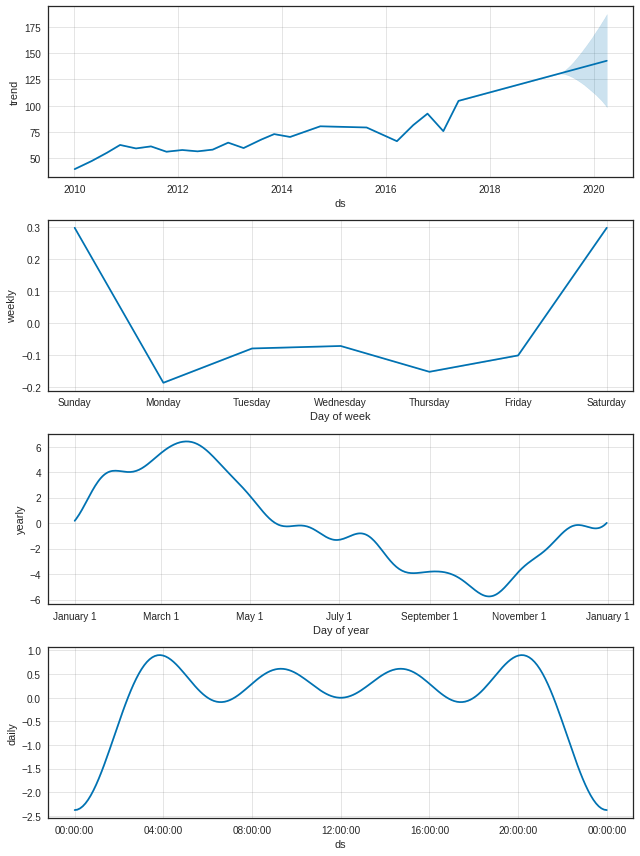

In [0]:
%%time
forecast_df1 = create_forecast('VAR','2010-01-01',datetime.date.today(),'daily')

Notice that Prophet includes a monthly annual trend graph. Let's explore how we can use this to extract insights from datasets

In [0]:
cville_df1 = quandl_data('ZILLOW/M193_DOZP')

In [0]:
cville_df1.head()
#cville_df1.describe()

,Value
Date,
2010-01-31,160.500
2010-02-28,200.625
2010-03-31,191.500
2010-04-30,180.000
2010-05-31,154.750


##Number of days a property is on Zillow in Charlottesville, VA (Metro area)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RMSE:
CPU times: user 27.8 s, sys: 16.1 s, total: 43.9 s
Wall time: 22.9 s


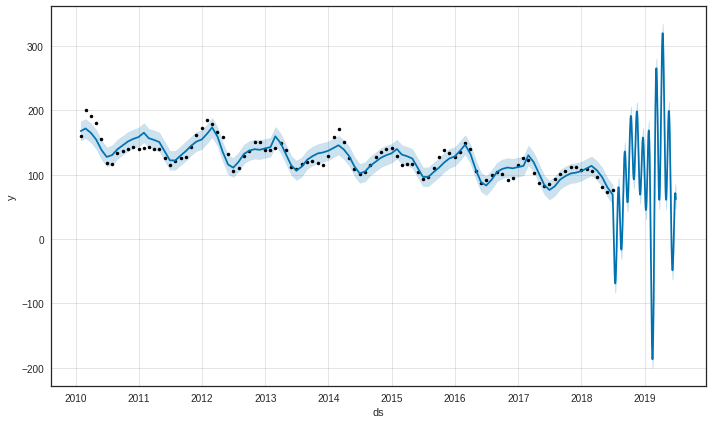

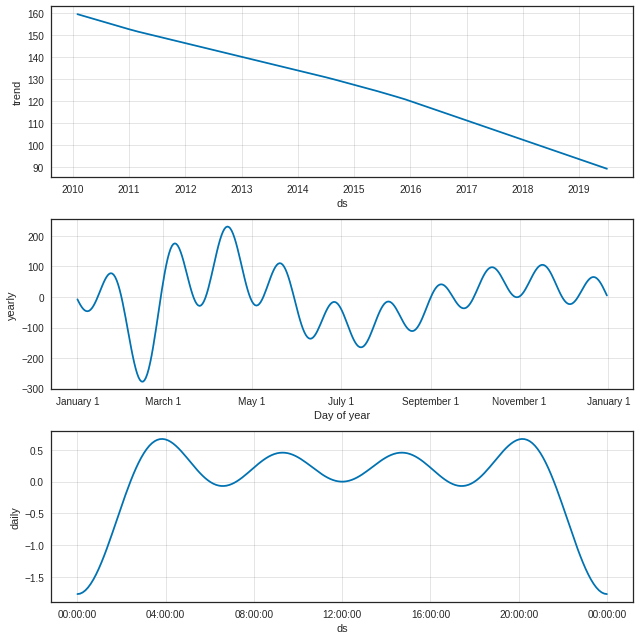

In [0]:
%%time
forecast2_df1 = create_forecast_2('ZILLOW/M193_DOZP','Value')

In [0]:
%%time
quandl_df1 = quandl_data('AAII/AAII_SENTIMENT')

CPU times: user 249 ms, sys: 2.18 ms, total: 251 ms
Wall time: 818 ms


In [0]:
quandl_df1.head()

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.28285,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.28285,314.59,307.63,314.59
1987-07-24,0.36,0.50,0.14,1.0,NaN,0.22,0.386014,0.489178,0.28285,311.39,307.81,309.27
1987-07-31,0.26,0.48,0.26,1.0,NaN,0.00,0.386014,0.489178,0.28285,318.66,310.65,318.66
1987-08-07,0.56,0.15,0.29,1.0,NaN,0.27,0.386014,0.489178,0.28285,323.00,316.23,323.00


In [0]:
quandl_df1.describe()

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
count,1652.000000,1652.000000,1652.000000,1652.000000,1638.000000,1652.000000,1655.000000,1655.000000,1655.000000,1654.000000,1654.000000,1654.000000
mean,0.382127,0.314606,0.303266,0.999999,0.381643,0.078861,0.384669,0.487901,0.281437,1164.054063,1134.497655,1151.423373
std,0.101305,0.085331,0.095062,0.000061,0.078186,0.176966,0.000727,0.001194,0.000313,654.179688,636.473901,646.949951
min,0.120000,0.076900,0.060000,0.999600,0.175000,-0.540000,0.382127,0.483432,0.280002,233.450000,223.920000,223.920000
25%,0.309890,0.250916,0.235825,1.000000,0.325335,-0.040000,0.384907,0.488293,0.281522,542.432500,530.912500,541.060000
50%,0.379310,0.314000,0.291623,1.000000,0.379606,0.080000,0.384907,0.488293,0.281522,1148.420000,1123.405000,1138.345000
75%,0.446778,0.371400,0.359167,1.000000,0.432269,0.198105,0.384907,0.488293,0.281522,1440.557500,1401.455000,1422.482500
max,0.750000,0.620000,0.702700,1.002000,0.644650,0.628600,0.386014,0.489178,0.282850,2940.910000,2903.280000,2925.510000


Let's see if we can find any trends in the bullish ratio

In [0]:
#quandl_df1_formatted = pd.DataFrame(quandl_df1.iloc[:,:6],index=quandl_df1.index)

In [0]:
#quandl_df1_formatted.head()

In [0]:
#quandl_df1_formatted.describe()

RMSE:
CPU times: user 37.3 s, sys: 19.7 s, total: 57 s
Wall time: 31.2 s


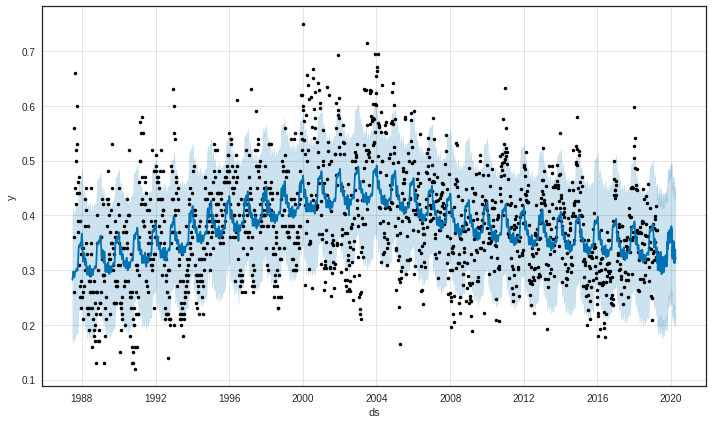

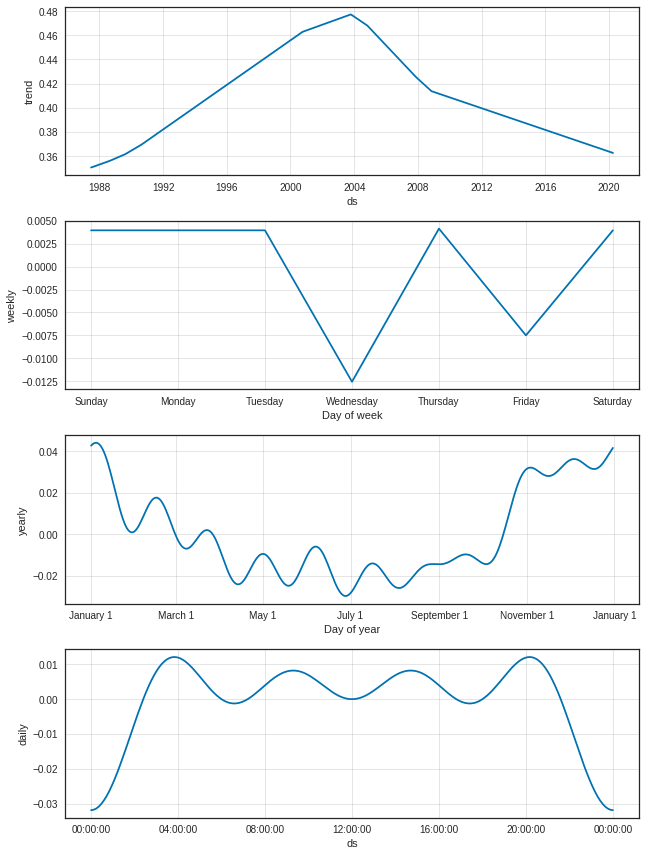

In [0]:
%%time
forecast2_df1 = create_forecast_3(quandl_df1,'Bullish')

It looks like individual investors tend to get more bullish in the months following July. 

## Natural Gas Production - USA

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RMSE:
CPU times: user 26.6 s, sys: 15.8 s, total: 42.4 s
Wall time: 22 s


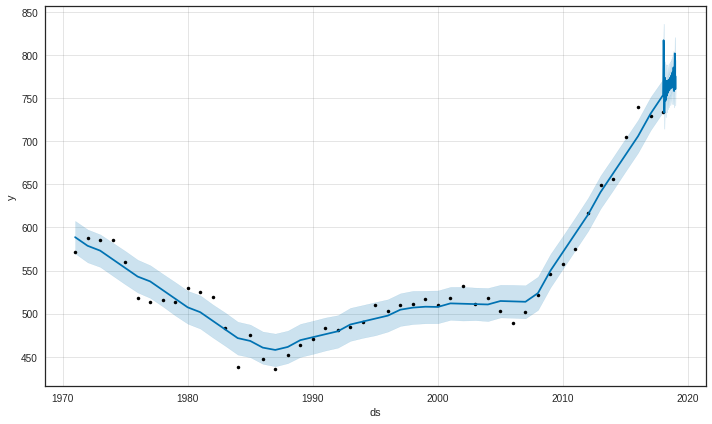

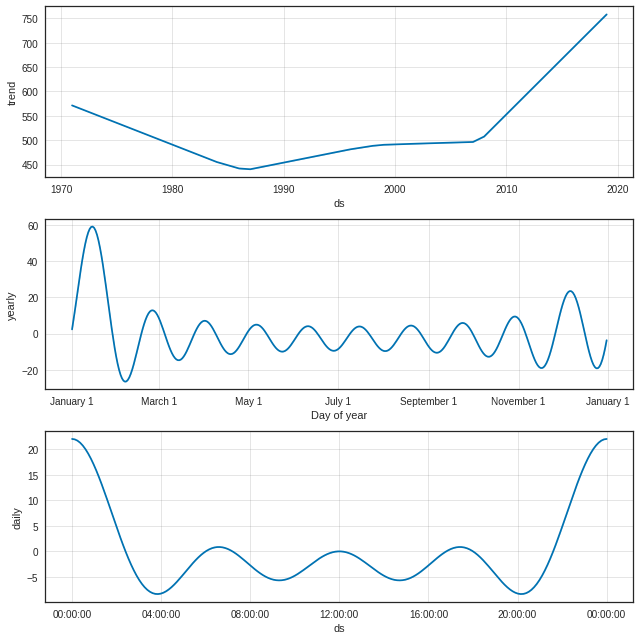

In [0]:
%%time
forecast2_df2 = create_forecast_2('BP/GAS_PROD_USA','Value')

Unfortunately it looks like we can't learn much from the data in the chart above. It would be helpful if the data was reported on a higher granularity because it wouldl allow us to drill down into the trends in greater detail.

There also isn't a large enough number of samples to build a robust model.